# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [3]:
# Your code here - Manipulate column names
subs = [(' ', '_'),('.',''),("'",""),('™',''),('®',''),('+','plus'),
        ('½','half'),('-','_')]

def col_formating(col):
    """
    For use with list comprehension
    Prerequisite:  a list called "subs" containing tuples filled with 
    characters from data frame's column names and what you wish to replace 
    them with.
    
    Input: data frame column
    Output: formatted data frame column
    """
    
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [4]:
df.columns = [col_formating(col) for col in df.columns]
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [5]:
# Your code here - Define the target and predictors
target = 'list_price'
preds = list(df.columns)
preds.remove(target)

In [6]:
# Your code here - Split into train and test
train, test =  train_test_split(df)

In [7]:
# Your code here - Fit the actual model
predictors = '+'.join(preds)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     584.0
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:57:43   Log-Likelihood:                -40479.
No. Observations:                8152   AIC:                         8.115e+04
Df Residuals:                    8057   BIC:                         8.181e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.3760      1.725     37.318      0.000      60.994      67.758
piece_count                                         75.3952      0.880     85.640      0.000      73.669      77.121
num_reviews                                          6.9888      0.669     10.446      0.000       5.677       8.300
play_star_rating                                     5.2242      0.622      8.394      0.000       4.004       6.444
star_rating                                         -1.1823      0.711     -1.664      0.096      -2.575       0.210
val_star_rating                                     -8.8394      0.636    -13.909      0.000     -10.085      -7.594
ages_10plus                                        123.2182      6.525     18.884      0.000     110.427     136.009
ages_10_14                                         -23.8885      8.876     -2.691      0.007     -41.288      -6.489
ages_10_16                                          -9.1769      3.968     -2.313      0.021     -16.955      -1.398
ages_10_21                                          58.1166      7.176      8.099      0.000      44.050      72.183
ages_11_16                                         -24.4034      5.678     -4.298      0.000     -35.533     -13.273
ages_12plus                                         72.9951      5.473     13.337      0.000      62.266      83.724
ages_12_16                                         -60.5971      6.702     -9.041      0.000     -73.736     -47.459
ages_14plus                                         23.2576      4.005      5.807      0.000      15.407      31.109
ages_16plus                                         43.2117      6.036      7.159      0.000      31.379      55.044
ages_1half_3                                        -8.6035      2.383     -3.611      0.000     -13.274      -3.933
ages_1half_5                                        -4.8078      2.884     -1.667      0.095     -10.460       0.845
ages_2_5                                            14.8998      1.659      8.979      0.000      11.647      18.152
ages_4plus                                         -20.5521      6.437     -3.193      0.001     -33.169      -7.935
ages_4_7                                            -6.0525      3.502     -1.728      0.084     -12.918       0.813
ages_4_99                                           -1.7235      3.654     -0.472      0.637      -8.886       5.438
ages_5plus                                          -9.9422      2.970     -3.348      0.001     -15.763      -4.121
ages_5_12                                          -33.9525      3.110    -10.916      0.000     -40.049     -27.856
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [22]:
# Your code here - Remove features which do not appear to be statistically relevant
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

73 66
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,63.5140,1.598,39.744,0.0,60.381,66.647
piece_count,75.4571,0.865,87.227,0.0,73.761,77.153
num_reviews,7.1435,0.662,10.793,0.0,5.846,8.441
play_star_rating,4.8721,0.526,9.256,0.0,3.840,5.904
val_star_rating,-9.4139,0.500,-18.817,0.0,-10.395,-8.433


In [9]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     773.1
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:57:44   Log-Likelihood:                -40489.
No. Observations:                8152   AIC:                         8.112e+04
Df Residuals:                    8080   BIC:                         8.163e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.5140      1.598     39.744      0.000      60.381      66.647
piece_count                                         75.4571      0.865     87.227      0.000      73.761      77.153
num_reviews                                          7.1435      0.662     10.793      0.000       5.846       8.441
play_star_rating                                     4.8721      0.526      9.256      0.000       3.840       5.904
val_star_rating                                     -9.4139      0.500    -18.817      0.000     -10.395      -8.433
ages_10plus                                        130.0249      7.559     17.201      0.000     115.207     144.843
ages_10_14                                         -18.1676      9.245     -1.965      0.049     -36.290      -0.045
ages_10_16                                          -4.6774      3.804     -1.230      0.219     -12.134       2.779
ages_10_21                                          65.0719      8.043      8.090      0.000      49.305      80.839
ages_11_16                                         -20.0014      5.533     -3.615      0.000     -30.848      -9.155
ages_12plus                                         78.7256      6.615     11.901      0.000      65.758      91.693
ages_12_16                                         -55.9055      7.080     -7.897      0.000     -69.783     -42.028
ages_14plus                                         28.3825      4.750      5.975      0.000      19.072      37.693
ages_16plus                                         47.2560      6.866      6.883      0.000      33.797      60.715
ages_1half_3                                        -2.0520      3.112     -0.659      0.510      -8.153       4.049
ages_2_5                                            20.9489      2.034     10.298      0.000      16.961      24.936
ages_4plus                                         -20.8568      9.825     -2.123      0.034     -40.116      -1.598
ages_5plus                                          -8.3585      2.919     -2.863      0.004     -14.081      -2.636
ages_5_12                                          -27.3994      2.750     -9.963      0.000     -32.790     -22.009
ages_6plus                                         -19.3942      5.274     -3.677      0.000     -29.732      -9.056
ages_6_12                                          -15.8324      1.950     -8.121      0.000     -19.654     -12.011
ages_6_14                                           -1.9607      4.089     -0.480      0.632      -9.976       6.054
ages_7_12                                          -14.4435      2.246     -6.430      0.000     -18.847     -10.040
ages_7_14                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [23]:
# Your code here - Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

73 66
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,63.5140,1.598,39.744,0.0,60.381,66.647
piece_count,75.4571,0.865,87.227,0.0,73.761,77.153
num_reviews,7.1435,0.662,10.793,0.0,5.846,8.441
play_star_rating,4.8721,0.526,9.256,0.0,3.840,5.904
val_star_rating,-9.4139,0.500,-18.817,0.0,-10.395,-8.433


In [25]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = target + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     843.9
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:04:14   Log-Likelihood:                -40494.
No. Observations:                8152   AIC:                         8.112e+04
Df Residuals:                    8086   BIC:                         8.158e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.5528      1.283     49.548      0.000      61.038      66.067
piece_count                                         75.2875      0.844     89.159      0.000      73.632      76.943
num_reviews                                          7.1084      0.661     10.755      0.000       5.813       8.404
play_star_rating                                     4.9457      0.520      9.506      0.000       3.926       5.966
val_star_rating                                     -9.4636      0.494    -19.174      0.000     -10.431      -8.496
ages_10plus                                        131.6214      7.343     17.925      0.000     117.228     146.015
ages_10_14                                         -16.2715      9.158     -1.777      0.076     -34.224       1.681
ages_10_21                                          66.6439      7.825      8.517      0.000      51.305      81.983
ages_11_16                                         -18.3644      5.375     -3.416      0.001     -28.902      -7.827
ages_12plus                                         80.8426      6.332     12.767      0.000      68.430      93.255
ages_12_16                                         -53.7807      6.895     -7.800      0.000     -67.297     -40.264
ages_14plus                                         30.5717      4.441      6.883      0.000      21.865      39.278
ages_16plus                                         49.8136      6.530      7.628      0.000      37.013      62.614
ages_2_5                                            21.8918      1.856     11.792      0.000      18.253      25.531
ages_4plus                                         -20.9424      9.825     -2.132      0.033     -40.201      -1.683
ages_5plus                                          -7.8714      2.890     -2.723      0.006     -13.537      -2.206
ages_5_12                                          -26.3700      2.592    -10.173      0.000     -31.451     -21.289
ages_6plus                                         -18.3210      5.196     -3.526      0.000     -28.506      -8.135
ages_6_12                                          -14.6692      1.700     -8.628      0.000     -18.002     -11.337
ages_7_12                                          -13.2737      2.042     -6.500      0.000     -17.277      -9.270
ages_7_14                                          -10.2838      1.806     -5.695      0.000     -13.824      -6.744
ages_8plus                                          18.9064      4.906      3.854      0.000       9.290      28.523
ages_8_12                                          -13.0805      2.616     -5.000      0.000     -18.209      -7.952
ages_8_14                                

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [26]:
# Your code here - Code a way to identify multicollinearity
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.507682246505712),
 ('num_reviews', 2.93041653274167),
 ('play_star_rating', 1.8038984267822582),
 ('val_star_rating', 1.6184422016988973),
 ('ages_10plus', 17.844580793160848),
 ('ages_10_14', 1.095188619264123),
 ('ages_10_21', 7.185430826175951),
 ('ages_11_16', 1.146251243653364),
 ('ages_12plus', 7.158034011363237),
 ('ages_12_16', 1.184790060517442),
 ('ages_14plus', 2.180486656519535),
 ('ages_16plus', 9.299333106361377),
 ('ages_2_5', 1.1997362769513442),
 ('ages_4plus', 1.1993540353504486),
 ('ages_5plus', inf),
 ('ages_5_12', 3.2278919666412227),
 ('ages_6plus', 2.665908416350398),
 ('ages_6_12', 1.9231788421408353),
 ('ages_7_12', 1.475564475659958),
 ('ages_7_14', 1.9441726896527625),
 ('ages_8plus', 3.3419927059680306),
 ('ages_8_12', 1.2618959514045776),
 ('ages_8_14', 1.9766075763648512),
 ('ages_9plus', 1.5563358644104632),
 ('ages_9_12', 1.0191317646364315),
 ('ages_9_14', 1.8522134687516494),
 ('theme_name_Architecture', 5.901431834282121),
 ('theme_

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [27]:
# Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

66 57


In [28]:
# Your code here - Refit model with subset features
predictors = '+'.join(x_cols)
formula = target + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     849.2
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:11:09   Log-Likelihood:                -40938.
No. Observations:                8152   AIC:                         8.199e+04
Df Residuals:                    8094   BIC:                         8.240e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           69.6577      1.076     64.755      0.000      67.549      71.766
piece_count                                         77.5243      0.680    114.020      0.000      76.192      78.857
num_reviews                                          6.1616      0.643      9.583      0.000       4.901       7.422
play_star_rating                                     6.6298      0.494     13.410      0.000       5.661       7.599
val_star_rating                                    -11.3814      0.495    -22.997      0.000     -12.351     -10.411
ages_10_14                                         -34.9606      9.604     -3.640      0.000     -53.788     -16.134
ages_11_16                                         -32.5269      5.364     -6.064      0.000     -43.041     -22.013
ages_12_16                                         -70.8991      6.864    -10.330      0.000     -84.353     -57.445
ages_14plus                                          5.6883      3.893      1.461      0.144      -1.942      13.319
ages_2_5                                            16.6511      1.818      9.160      0.000      13.088      20.215
ages_4plus                                         -13.9701     10.305     -1.356      0.175     -34.171       6.231
ages_5_12                                          -33.2728      2.643    -12.591      0.000     -38.453     -28.092
ages_6plus                                         -26.2208      5.433     -4.826      0.000     -36.872     -15.570
ages_6_12                                          -22.8080      1.633    -13.963      0.000     -26.010     -19.606
ages_7_12                                          -20.3989      2.026    -10.070      0.000     -24.370     -16.428
ages_7_14                                          -17.8205      1.774    -10.045      0.000     -21.298     -14.343
ages_8plus                                          -2.6786      4.343     -0.617      0.537     -11.193       5.836
ages_8_12                                          -20.0709      2.610     -7.690      0.000     -25.187     -14.955
ages_8_14                                          -18.8764      1.882    -10.032      0.000     -22.565     -15.188
ages_9plus                                          15.3822     10.529      1.461      0.144      -5.258      36.023
ages_9_12                                          -31.6461      6.344     -4.988      0.000     -44.083     -19.210
ages_9_14                                          -17.7750      2.579     -6.893      0.000     -22.830     -12.720
theme_name_BOOST                                    86.2456     10.114      8.528      0.000      66.420     106.071
theme_name_Blues_Helicopter_Pursuit      

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

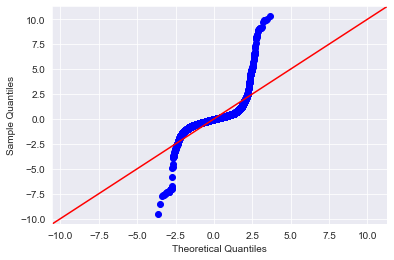

In [29]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

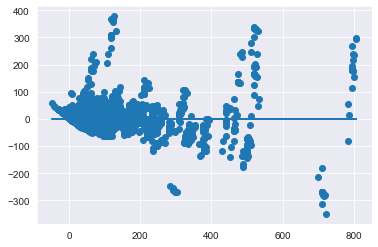

In [30]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

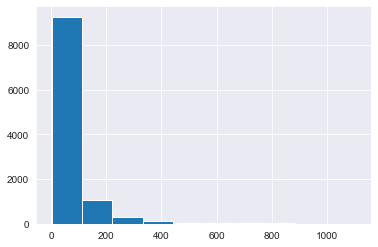

In [31]:
# Your code here - Check for outliers
df.list_price.hist()

In [33]:
# Your code here
# Remove extreme outliers
for i in range(80, 100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

# Rerun the model
orig_tot = len(df)
df = df[df.list_price < 450] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = target + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878
Percent removed: 0.010487580496780129


C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.8
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:30:48   Log-Likelihood:                -5001.5
No. Observations:                8067   AIC:                         1.012e+04
Df Residuals:                    8009   BIC:                         1.052e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4350      0.013    254.698      0.000       3.409       3.461
piece_count                                          0.5970      0.010     58.537      0.000       0.577       0.617
num_reviews                                          0.0164      0.008      1.997      0.046       0.000       0.033
play_star_rating                                     0.1072      0.006     17.821      0.000       0.095       0.119
val_star_rating                                     -0.1481      0.006    -24.189      0.000      -0.160      -0.136
ages_10_14                                           0.2956      0.130      2.281      0.023       0.042       0.550
ages_11_16                                           0.2858      0.067      4.262      0.000       0.154       0.417
ages_12_16                                          -0.0732      0.090     -0.817      0.414      -0.249       0.102
ages_14plus                                          0.2539      0.052      4.869      0.000       0.152       0.356
ages_2_5                                             0.4552      0.022     20.505      0.000       0.412       0.499
ages_4plus                                          -1.4303      0.120    -11.915      0.000      -1.666      -1.195
ages_5_12                                           -0.7603      0.033    -23.231      0.000      -0.825      -0.696
ages_6plus                                          -0.9629      0.071    -13.488      0.000      -1.103      -0.823
ages_6_12                                           -0.1870      0.020     -9.298      0.000      -0.226      -0.148
ages_7_12                                            0.0863      0.025      3.414      0.001       0.037       0.136
ages_7_14                                           -0.0310      0.022     -1.423      0.155      -0.074       0.012
ages_8plus                                           0.5503      0.055      9.999      0.000       0.442       0.658
ages_8_12                                            0.2604      0.032      8.248      0.000       0.199       0.322
ages_8_14                                            0.3308      0.023     14.332      0.000       0.286       0.376
ages_9plus                                           0.2758      0.133      2.076      0.038       0.015       0.536
ages_9_12                                            0.3483      0.081      4.284      0.000       0.189       0.508
ages_9_14                                            0.4789      0.031     15.219      0.000       0.417       0.541
theme_name_BOOST                                     1.0252      0.139      7.363      0.000       0.752       1.298
theme_name_Blues_Helicopter_Pursuit      

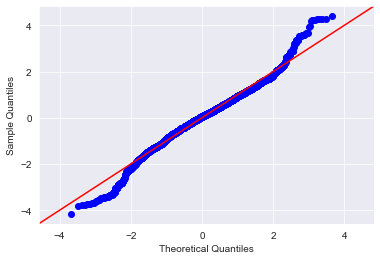

In [34]:
# Your code here - Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

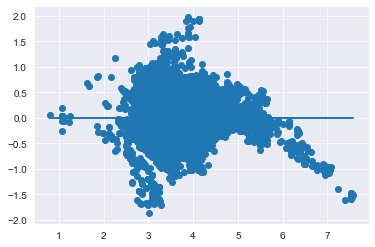

In [35]:
# Your code here - Check the Homoscedasticity Assumption
# list price increases, but the model is much improved. Further subsetting is potentially warranted.
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 percentile: 4.447203233446613
0.81 percentile: 4.512971560274537
0.82 percentile: 4.542526402035123
0.83 percentile: 4.580752485605895
0.84 percentile: 4.640913706863106
0.85 percentile: 4.6985494117910225
0.86 percentile: 4.718373863481943
0.87 percentile: 4.787408405976297
0.88 percentile: 4.8039210397329235
0.89 percentile: 4.826327766567244
0.9 percentile: 4.89924031131419
0.91 percentile: 4.976713742220571
0.92 percentile: 5.0490223265009595
0.93 percentile: 5.140421850231899
0.94 percentile: 5.209419483952433
0.95 percentile: 5.292263579298989
0.96 percentile: 5.391752152536553
0.97 percentile: 5.528952783620542
0.98 percentile: 5.678340376637527
0.99 percentile: 5.873347331375852


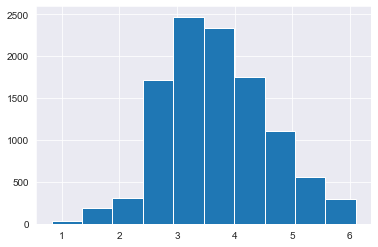

In [36]:
# Your code goes here
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

df.list_price.hist()


In [38]:
df = df[df.list_price <= 6]
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     422.1
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:33:31   Log-Likelihood:                -4846.3
No. Observations:                8027   AIC:                             9809.
Df Residuals:                    7969   BIC:                         1.021e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4540      0.014    253.061      0.000       3.427       3.481
piece_count                                          0.6524      0.011     58.626      0.000       0.631       0.674
num_reviews                                          0.0258      0.008      3.088      0.002       0.009       0.042
play_star_rating                                     0.1008      0.006     16.810      0.000       0.089       0.113
val_star_rating                                     -0.1426      0.006    -23.845      0.000      -0.154      -0.131
ages_10_14                                           0.3107      0.123      2.522      0.012       0.069       0.552
ages_11_16                                           0.1538      0.068      2.257      0.024       0.020       0.287
ages_12_16                                          -0.3021      0.087     -3.465      0.001      -0.473      -0.131
ages_14plus                                          0.1619      0.053      3.059      0.002       0.058       0.266
ages_2_5                                             0.4745      0.022     21.642      0.000       0.432       0.517
ages_4plus                                          -1.4696      0.116    -12.648      0.000      -1.697      -1.242
ages_5_12                                           -0.7494      0.032    -23.382      0.000      -0.812      -0.687
ages_6plus                                          -1.0029      0.072    -13.986      0.000      -1.144      -0.862
ages_6_12                                           -0.2017      0.020    -10.221      0.000      -0.240      -0.163
ages_7_12                                            0.0762      0.024      3.116      0.002       0.028       0.124
ages_7_14                                           -0.0441      0.021     -2.053      0.040      -0.086      -0.002
ages_8plus                                           0.5794      0.055     10.565      0.000       0.472       0.687
ages_8_12                                            0.2330      0.031      7.490      0.000       0.172       0.294
ages_8_14                                            0.2923      0.023     12.923      0.000       0.248       0.337
ages_9plus                                           0.3102      0.121      2.569      0.010       0.073       0.547
ages_9_12                                            0.3218      0.080      4.025      0.000       0.165       0.479
ages_9_14                                            0.4099      0.031     13.018      0.000       0.348       0.472
theme_name_BOOST                                     0.9875      0.118      8.353      0.000       0.756       1.219
theme_name_Blues_Helicopter_Pursuit      

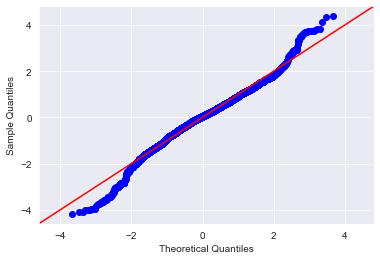

In [39]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

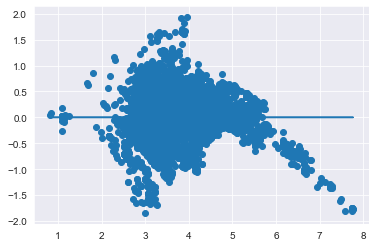

In [40]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 